In [1]:
#dependencies
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime as dt

In [2]:
data = pd.read_csv('../data/train_month_3_with_target.csv',parse_dates = [29,30,32])
print(f'Rows: {data.client_id.count()}')
print(f'Columns: {data.columns.size}')
print(data.dtypes)
data.head()

Rows: 63697
Columns: 40
client_id                                    object
homebanking_active                            int64
has_homebanking                               int64
has_insurance_21                              int64
has_insurance_23                              int64
has_life_insurance_fixed_cap                  int64
has_life_insurance_decreasing_cap             int64
has_fire_car_other_insurance                  int64
has_personal_loan                             int64
has_mortgage_loan                             int64
has_current_account                           int64
has_pension_saving                            int64
has_savings_account                           int64
has_savings_account_starter                   int64
has_current_account_starter                   int64
bal_insurance_21                              int64
bal_insurance_23                              int64
cap_life_insurance_fixed_cap                  int64
cap_life_insurance_decreasing_cap       

,client_id,homebanking_active,has_homebanking,has_insurance_21,has_insurance_23,has_life_insurance_fixed_cap,has_life_insurance_decreasing_cap,has_fire_car_other_insurance,has_personal_loan,has_mortgage_loan,...,customer_since_bank,customer_gender,customer_birth_date,customer_postal_code,customer_occupation_code,customer_self_employed,customer_education,customer_children,customer_relationship,target
0,910df42ad36243aa4ce16324cd7b15b0,0,0,0,0,0,0,1,0,0,...,1994-08-01,1,1943-09-01,3630,9.0,0,0.0,NaN,NaN,0
1,4e19dc3a54323c5bbfc374664b950cd1,1,1,0,0,0,0,0,0,0,...,2017-01-01,1,1994-02-01,2460,9.0,0,NaN,mature,couple,0
2,f5d08db1b86c0cb0f566bf446cff1fb4,1,1,0,0,0,0,1,0,0,...,1980-12-01,2,1936-10-01,2660,9.0,0,NaN,NaN,single,0
3,26170ecf63653e215c52f4262c1c4859,0,0,0,0,0,0,1,0,0,...,2013-10-01,1,1946-09-01,6600,9.0,0,NaN,NaN,NaN,0
4,c078009957dffb64f20e61b41220a976,0,0,0,0,0,0,0,0,0,...,2012-11-01,2,1996-04-01,8550,9.0,0,NaN,mature,couple,1


In [3]:
data.columns

Index(['client_id', 'homebanking_active', 'has_homebanking',
       'has_insurance_21', 'has_insurance_23', 'has_life_insurance_fixed_cap',
       'has_life_insurance_decreasing_cap', 'has_fire_car_other_insurance',
       'has_personal_loan', 'has_mortgage_loan', 'has_current_account',
       'has_pension_saving', 'has_savings_account',
       'has_savings_account_starter', 'has_current_account_starter',
       'bal_insurance_21', 'bal_insurance_23', 'cap_life_insurance_fixed_cap',
       'cap_life_insurance_decreasing_cap', 'prem_fire_car_other_insurance',
       'bal_personal_loan', 'bal_mortgage_loan', 'bal_current_account',
       'bal_pension_saving', 'bal_savings_account',
       'bal_savings_account_starter', 'bal_current_account_starter',
       'visits_distinct_so', 'visits_distinct_so_areas', 'customer_since_all',
       'customer_since_bank', 'customer_gender', 'customer_birth_date',
       'customer_postal_code', 'customer_occupation_code',
       'customer_self_employed',

In [4]:
data.describe()

,homebanking_active,has_homebanking,has_insurance_21,has_insurance_23,has_life_insurance_fixed_cap,has_life_insurance_decreasing_cap,has_fire_car_other_insurance,has_personal_loan,has_mortgage_loan,has_current_account,...,bal_savings_account_starter,bal_current_account_starter,visits_distinct_so,visits_distinct_so_areas,customer_gender,customer_postal_code,customer_occupation_code,customer_self_employed,customer_education,target
count,63697.000000,63697.000000,63697.000000,63697.000000,63697.000000,63697.000000,63697.000000,63697.000000,63697.000000,63697.000000,...,63697.000000,63697.000000,63697.000000,63697.000000,63697.000000,63697.000000,61695.000000,63697.000000,16572.000000,63697.000000
mean,0.215191,0.280939,0.095028,0.009953,0.002747,0.111779,0.318053,0.041619,0.098089,0.500809,...,57.641176,30.320894,1.230199,1.042608,1.486444,5577.261959,8.773531,0.087021,2.463734,0.030033
std,0.410958,0.449462,0.293256,0.099270,0.052344,0.315097,0.465724,0.199718,0.297438,0.500003,...,892.959859,407.877892,0.501498,0.224991,0.499820,3020.064554,1.131453,0.281869,1.520309,0.170679
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-330.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,2650.000000,9.000000,0.000000,2.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,4877.000000,9.000000,0.000000,2.000000,0.000000
75%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,1.000000,2.000000,8750.000000,9.000000,0.000000,3.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,24050.000000,19790.000000,7.000000,6.000000,2.000000,9992.000000,9.000000,1.000000,6.000000,1.000000


In [5]:
(data.isna().sum()/63697).sort_values(ascending = False)

customer_education                   0.739831
customer_children                    0.366799
customer_relationship                0.233904
customer_occupation_code             0.031430
customer_since_bank                  0.003909
customer_since_all                   0.003674
visits_distinct_so                   0.000000
bal_current_account                  0.000000
bal_pension_saving                   0.000000
bal_savings_account                  0.000000
bal_savings_account_starter          0.000000
bal_current_account_starter          0.000000
client_id                            0.000000
visits_distinct_so_areas             0.000000
homebanking_active                   0.000000
customer_gender                      0.000000
customer_birth_date                  0.000000
customer_postal_code                 0.000000
customer_self_employed               0.000000
bal_mortgage_loan                    0.000000
bal_personal_loan                    0.000000
prem_fire_car_other_insurance     

In [6]:
data.target.value_counts(normalize = True)

0    0.969967
1    0.030033
Name: target, dtype: float64

In [7]:
corrs = data.corr()
abs(corrs.target).sort_values(ascending = False)

target                               1.000000
homebanking_active                   0.101469
has_homebanking                      0.098962
bal_mortgage_loan                    0.096654
has_life_insurance_decreasing_cap    0.094047
has_mortgage_loan                    0.093194
has_current_account                  0.093078
cap_life_insurance_decreasing_cap    0.086488
bal_savings_account                  0.071638
bal_current_account                  0.062886
has_personal_loan                    0.061892
bal_personal_loan                    0.059351
has_savings_account                  0.048442
visits_distinct_so                   0.042301
customer_gender                      0.027157
visits_distinct_so_areas             0.026775
prem_fire_car_other_insurance        0.026698
has_fire_car_other_insurance         0.025787
bal_current_account_starter          0.025302
has_current_account_starter          0.023994
has_savings_account_starter          0.018800
customer_postal_code              

<AxesSubplot:>

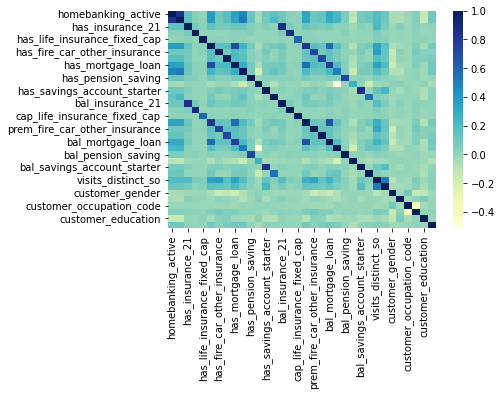

In [8]:
sb.heatmap(data.corr(), cmap="YlGnBu")

In [9]:
check_corr = ['customer_education','customer_children','customer_relationship','customer_occupation_code','customer_since_bank']
for var in check_corr:
    print('%s:\t %f' % (var,data[var].isna().corr(data.target) ))

customer_education:	 -0.109084
customer_children:	 -0.005475
customer_relationship:	 -0.000317
customer_occupation_code:	 0.008896
customer_since_bank:	 0.009614


Customers over 115y/o: 43


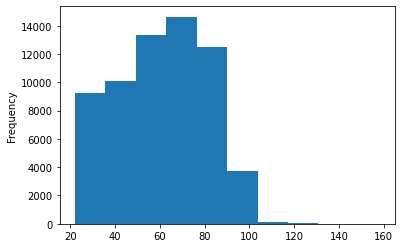

In [10]:
data['customer_age'] = dt.datetime.today().year-data.customer_birth_date.dt.year
data['customer_age'].plot(kind = 'hist')
outlier = data[(data['customer_age']>115)&(data['target']==0)].client_id.count()
print('Customers over 115y/o: %i' % (outlier))

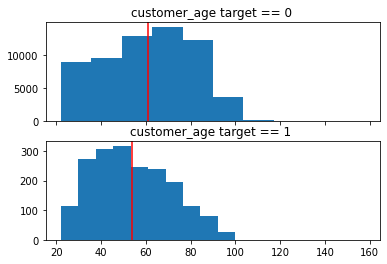

In [11]:
col = 'customer_age'
f,(ax1,ax2)=plt.subplots(2,1,sharex = True)
ax1.hist(data[data['target']==0][col])
ax1.set_title(col + ' target == 0 ')
ax1.axvline(x = np.mean(data[data['target']==0][col]), color = 'r')
ax2.hist(data[data['target']==1][col])
ax2.set_title(col + ' target == 1 ')
ax2.axvline(x = np.mean(data[data['target']==1][col]), color = 'r')


<AxesSubplot:ylabel='Frequency'>

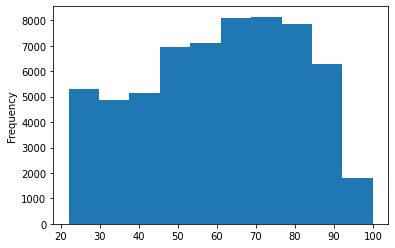

In [12]:
data[(data['customer_age']<=100)&(data['target']==0)].customer_age.plot(kind = 'hist')

In [13]:
abs(data.corr().customer_age).sort_values(ascending = False)

customer_age                         1.000000
has_homebanking                      0.405673
homebanking_active                   0.365088
has_life_insurance_decreasing_cap    0.270308
cap_life_insurance_decreasing_cap    0.262327
has_mortgage_loan                    0.224595
bal_mortgage_loan                    0.223849
has_current_account                  0.202742
bal_savings_account                  0.160099
has_insurance_21                     0.140590
customer_education                   0.100149
bal_insurance_21                     0.098374
has_personal_loan                    0.093987
has_current_account_starter          0.090641
visits_distinct_so                   0.086069
customer_self_employed               0.073583
has_pension_saving                   0.073189
bal_personal_loan                    0.067991
has_fire_car_other_insurance         0.062890
target                               0.059206
bal_current_account_starter          0.058047
customer_gender                   

In [14]:
data.customer_occupation_code.value_counts(normalize = True)

9.0    0.953659
4.0    0.026566
0.0    0.006824
8.0    0.005154
6.0    0.002966
5.0    0.002480
7.0    0.001686
1.0    0.000389
3.0    0.000162
2.0    0.000113
Name: customer_occupation_code, dtype: float64

In [15]:
data.groupby('customer_occupation_code').target.value_counts(normalize = True)

customer_occupation_code  target
0.0                       0         0.973872
                          1         0.026128
1.0                       0         1.000000
2.0                       0         1.000000
3.0                       0         0.900000
                          1         0.100000
4.0                       0         0.958511
                          1         0.041489
5.0                       0         0.928105
                          1         0.071895
6.0                       0         0.945355
                          1         0.054645
7.0                       0         0.961538
                          1         0.038462
8.0                       0         0.962264
                          1         0.037736
9.0                       0         0.970783
                          1         0.029217
Name: target, dtype: float64

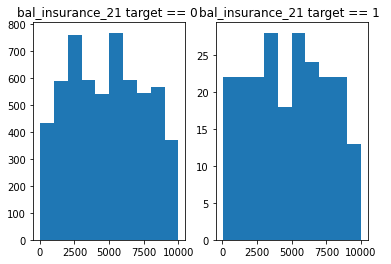

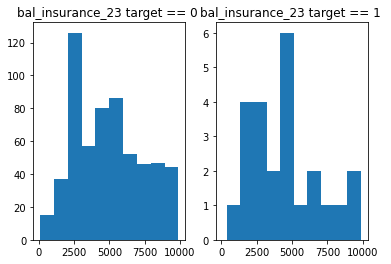

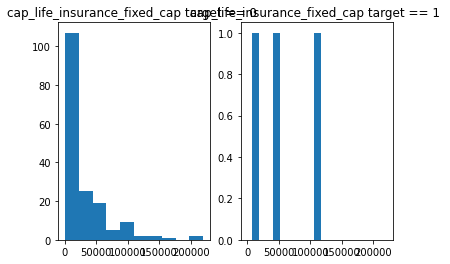

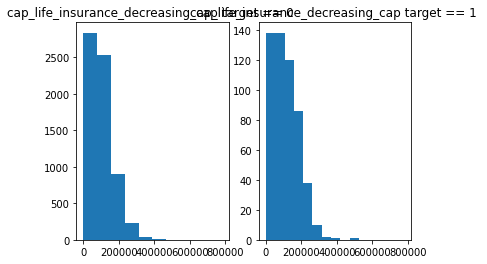

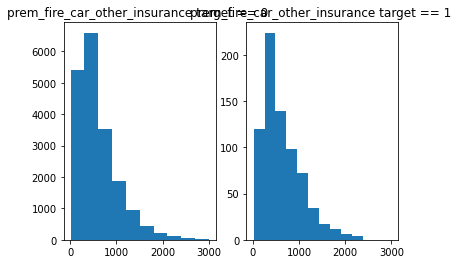

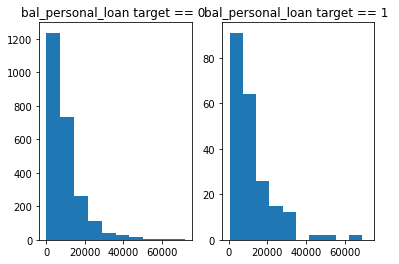

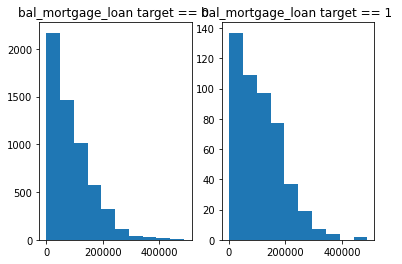

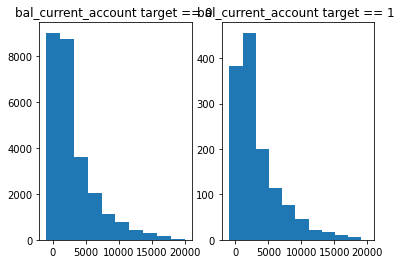

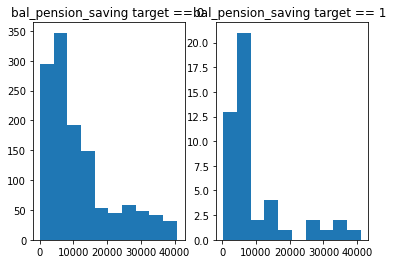

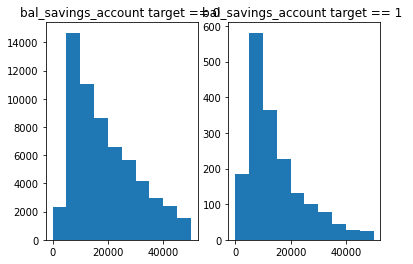

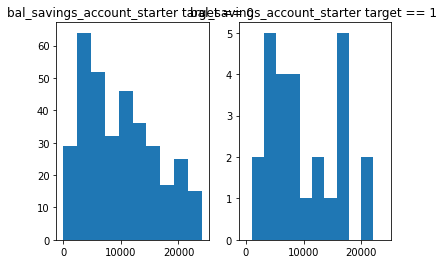

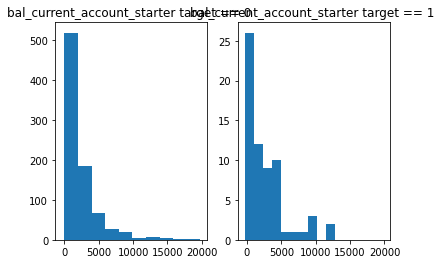

In [16]:
cols_cont = ['bal_insurance_21', 'bal_insurance_23', 'cap_life_insurance_fixed_cap',
       'cap_life_insurance_decreasing_cap', 'prem_fire_car_other_insurance',
       'bal_personal_loan', 'bal_mortgage_loan', 'bal_current_account',
       'bal_pension_saving', 'bal_savings_account',
       'bal_savings_account_starter', 'bal_current_account_starter']
for col in cols_cont:  
    f,(ax1,ax2)=plt.subplots(1,2,sharex = True)
    data_nozero = data[data[col]!=0]
    ax1.hist(data_nozero[data_nozero['target']==0][col])
    ax1.set_title(col + ' target == 0 ')
    ax2.hist(data_nozero[data_nozero['target']==1][col])
    ax2.set_title(col + ' target == 1 ')

<AxesSubplot:>

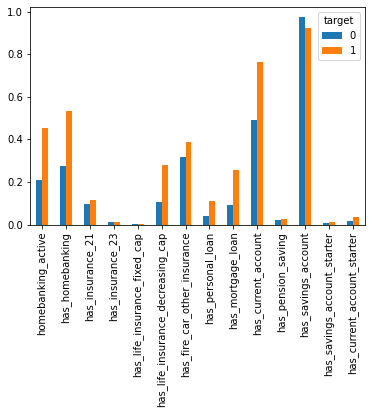

In [17]:
cols_binary = ['homebanking_active', 'has_homebanking',
       'has_insurance_21', 'has_insurance_23', 'has_life_insurance_fixed_cap',
       'has_life_insurance_decreasing_cap', 'has_fire_car_other_insurance',
       'has_personal_loan', 'has_mortgage_loan', 'has_current_account',
       'has_pension_saving', 'has_savings_account',
       'has_savings_account_starter', 'has_current_account_starter']

data.groupby('target').mean()[cols_binary].transpose().plot(kind = 'bar')